In [1]:
from neuromllite import Network, Cell, InputSource, Population, Synapse, RectangularRegion, RandomLayout 
from neuromllite import Projection, RandomConnectivity, Input, Simulation

net = Network(id='IClamp')
net.notes = 'Current clamp input'
net.parameters = { 'input_amp':       0.3} 

cell = Cell(id='L23_NoHotSpot', neuroml2_source_file='../L23_NoHotSpot.cell.nml')
net.cells.append(cell)

input_source = InputSource(id='i_clamp', 
                           pynn_input='DCSource', 
                           parameters={'amplitude':'input_amp', 'start':100, 'stop':800})

net.input_sources.append(input_source)

r1 = RectangularRegion(id='region1', x=0,y=0,z=0,width=1000,height=100,depth=1000)
net.regions.append(r1)

p0 = Population(id='pop0', size=1, component=cell.id, properties={'color':'1 0 0'},random_layout = RandomLayout(region=r1.id))

net.populations.append(p0)

net.inputs.append(Input(id='stim',
                        input_source=input_source.id,
                        population=p0.id,
                        percentage=100))

print(net.to_json())
new_file = net.to_json_file('%s.json'%net.id)

sim = Simulation(id='Sim%s'%net.id,
                 network=new_file,
                 duration='1000',
                 dt='0.025',
                 recordTraces={'all':'*'},
                 recordSpikes={'pop0':'*'})
                 
sim.to_json_file()

{
    "IClamp": {
        "version": "NeuroMLlite v0.2.1",
        "parameters": {
            "input_amp": 0.3
        },
        "notes": "Current clamp input",
        "cells": [
            {
                "L23_NoHotSpot": {
                    "neuroml2_source_file": "../L23_NoHotSpot.cell.nml"
                }
            }
        ],
        "input_sources": [
            {
                "i_clamp": {
                    "pynn_input": "DCSource",
                    "parameters": {
                        "amplitude": "input_amp",
                        "start": 100,
                        "stop": 800
                    }
                }
            }
        ],
        "regions": [
            {
                "region1": {
                    "x": 0.0,
                    "y": 0.0,
                    "z": 0.0,
                    "width": 1000.0,
                    "height": 100.0,
                    "depth": 1000.0
                }
            }
        ],
      

'SimIClamp.json'

In [2]:
from neuromllite.NetworkGenerator import generate_and_run
traces, events = generate_and_run(sim, simulator='jNeuroML_NEURON', return_results =True)

neuromllite >>> Loaded network specification from IClamp.json
neuromllite >>> Generating network IClamp and running in simulator: jNeuroML_NEURON...
neuromllite >>> Generating NeuroML2 for IClamp...
neuromllite >>> Starting net generation for IClamp...


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


libNeuroML >>> Id i_clamp not found in <neuroml> element. All ids: ['IClamp', 'L23_NoHotSpot']
libNeuroML >>> Id L23_NoHotSpot not found in <neuroml> element. All ids: ['IClamp']
neuromllite >>> *******************************************************
neuromllite >>> * NeuroMLDocument: IClamp
neuromllite >>> *
neuromllite >>> *   IncludeType: ['../L23_NoHotSpot.cell.nml']
neuromllite >>> *   PulseGenerator: ['i_clamp']
neuromllite >>> *
neuromllite >>> *  Network: IClamp
neuromllite >>> *
neuromllite >>> *   1 cells in 1 populations 
neuromllite >>> *     Population: pop0 with 1 components of type L23_NoHotSpot
neuromllite >>> *       Locations: [(966.4535, 44.0733, 7.4915), ...]
neuromllite >>> *       Properties: color=1 0 0; region=region1; 
neuromllite >>> *
neuromllite >>> *   0 connections in 0 projections 
neuromllite >>> *
neuromllite >>> *   1 inputs in 1 input lists 
neuromllite >>> *     Input list: stim to pop0, component i_clamp
neuromllite >>> *       1 inputs: [(Input 0: 

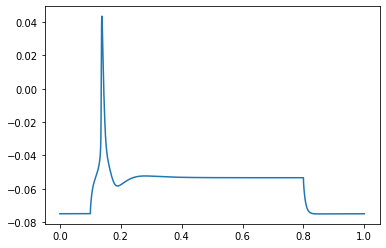

In [3]:

import matplotlib.pyplot as plt
plt.plot(traces['t'],traces['pop0/0/L23_NoHotSpot/v'])